## Import nescessary library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

from statsmodels.graphics.regressionplots import influence_plot

## 1. Data Collection

In [13]:
startup = pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 2. Data Understanding

#### Intial anaylsis

In [4]:
startup.shape

(50, 5)

In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
startup['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

# Data preparation

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
startup['State']=lb.fit_transform(startup['State'])


In [19]:
startup.drop('State_Encoded',inplace=True,axis = 1)


In [21]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [22]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

## Assumptions Check

### 1. Test for Linearity

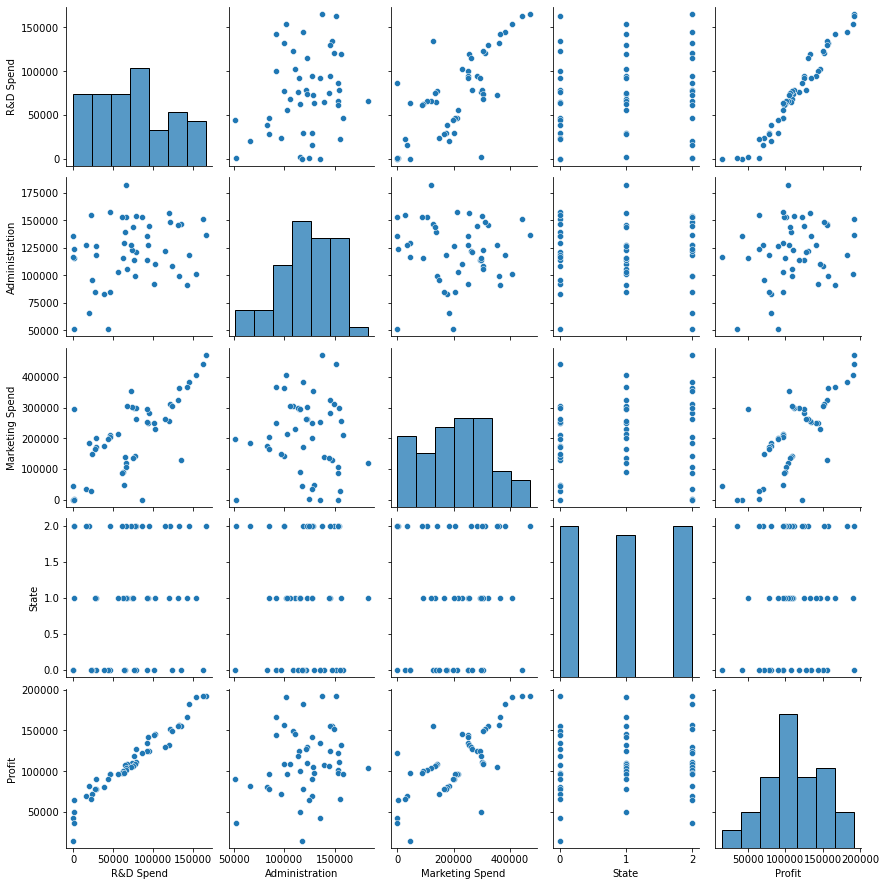

In [28]:
sns.pairplot(startup)

### 2. Test for Normailty

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

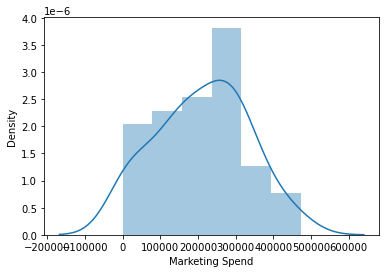

In [31]:
sns.distplot(startup['Marketing Spend'])

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

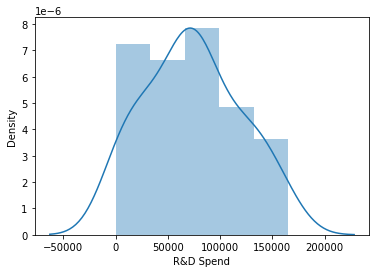

In [32]:
sns.distplot(startup['R&D Spend'])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

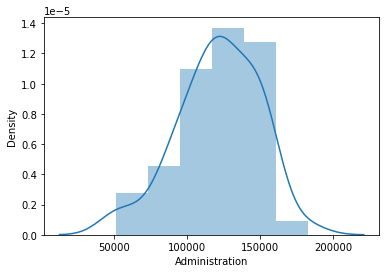

In [30]:
sns.distplot(startup['Administration'])

<AxesSubplot:xlabel='State', ylabel='Density'>

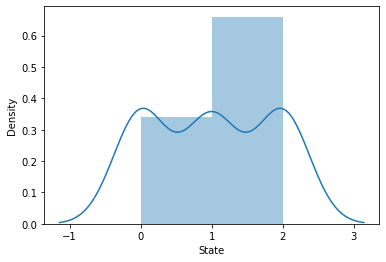

In [33]:
sns.distplot(startup['State'])

#### Using Probplot

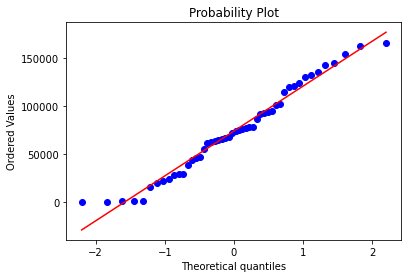

In [36]:
from scipy import stats
stats.probplot(startup['R&D Spend'],plot=plt)
plt.show()

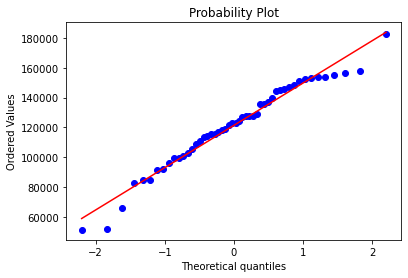

In [37]:
stats.probplot(startup['Administration'],plot=plt)
plt.show()

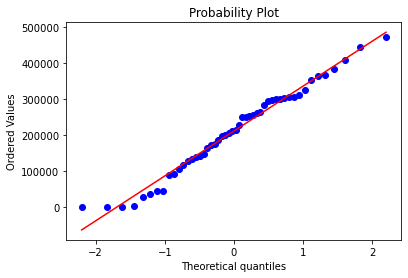

In [38]:
stats.probplot(startup['Marketing Spend'],plot=plt)
plt.show()

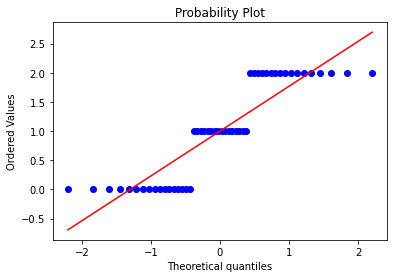

In [39]:
stats.probplot(startup['State'],plot=plt)
plt.show()

# Multicollinearity

In [55]:
corr_mat = startup.corr()
corr_mat

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<AxesSubplot:>

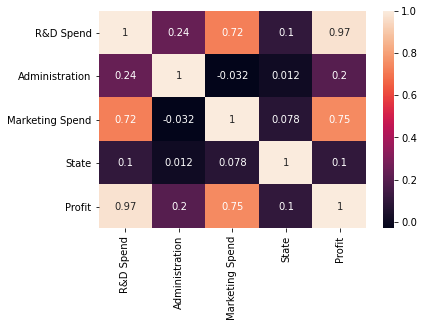

In [58]:
sns.heatmap(data=corr_mat,annot=True)

## Cal VIF

In [67]:
startup['R&D_Spend'] = startup['R&D Spend']
startup['Marketing_Spend'] = startup['Marketing Spend']

In [69]:
startup.drop(['R&D Spend','Marketing Spend'],axis = 1,inplace= True)

In [70]:
startup

,Administration,State,Profit,R&D_Spend,Marketing_Spend
0,136897.80,2,192261.83,165349.20,471784.10
1,151377.59,0,191792.06,162597.70,443898.53
2,101145.55,1,191050.39,153441.51,407934.54
3,118671.85,2,182901.99,144372.41,383199.62
4,91391.77,1,166187.94,142107.34,366168.42
5,99814.71,2,156991.12,131876.90,362861.36
6,147198.87,0,156122.51,134615.46,127716.82
7,145530.06,1,155752.60,130298.13,323876.68
8,148718.95,2,152211.77,120542.52,311613.29
9,108679.17,0,149759.96,123334.88,304981.62


In [80]:
X = startup.drop(['Profit','R&D_Spend'],axis= 1)
y = startup[['R&D_Spend']]


In [82]:
rsq_r_d = smf.ols('y~X',data=startup).fit().rsquared  
vif_r_d = 1/(1-rsq_r_d)
vif_r_d

2.48117810664151

In [84]:
X = startup.drop(['Profit','Administration'],axis= 1)
y = startup[['Administration']]

In [85]:
rsq_adm = smf.ols('y~X',data=startup).fit().rsquared  
vif_adm = 1/(1-rsq_adm)
vif_adm

1.1753153231430187

# Model Building

In [93]:
X = startup.drop('Profit',axis= 1)
y = startup[['Profit']]

In [41]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [40]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [26]:
model_1=smf.ols ('y~X',data=startup).fit()

In [27]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           8.51e-29
Time:                        22:46:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
X[0]           0.8058      0.046     17.609      0.000       0.714       0.898
X[1]          -0.0268      0.052     -0.520      0.606      -0.131       0.077
X[2]           0.0272      0.017      1.637      0.109      -0.006       0.061
X[3]         -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model building 2

In [94]:
startup

,Administration,State,Profit,R&D_Spend,Marketing_Spend
0,136897.80,2,192261.83,165349.20,471784.10
1,151377.59,0,191792.06,162597.70,443898.53
2,101145.55,1,191050.39,153441.51,407934.54
3,118671.85,2,182901.99,144372.41,383199.62
4,91391.77,1,166187.94,142107.34,366168.42
5,99814.71,2,156991.12,131876.90,362861.36
6,147198.87,0,156122.51,134615.46,127716.82
7,145530.06,1,155752.60,130298.13,323876.68
8,148718.95,2,152211.77,120542.52,311613.29
9,108679.17,0,149759.96,123334.88,304981.62


In [95]:
X = startup.drop(labels=['Profit','State'],axis=1)
y = startup[['Profit']]

In [96]:
model_2 = smf.ols('y~X',data= startup).fit()

In [97]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        23:30:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
X[0]          -0.0268      0.051     -0.526      0.602      -0.130       0.076
X[1]           0.8057      0.045     17.846      0.000       0.715       0.897
X[2]           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
y_pred = model_2.predict(X)

In [86]:
linear = LinearRegression()
linear.fit(X,y)

LinearRegression()

In [114]:
y_pred1 = linear.predict(X)

In [115]:
linear.coef_

array([[-4.31026870e+02,  3.41303062e-01, -9.99219480e-02]])

In [116]:
linear.intercept_

array([117700.29216709])

In [100]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
error1 =std.fit_transform(error)

# Model Evaluation

### Homoscadascity

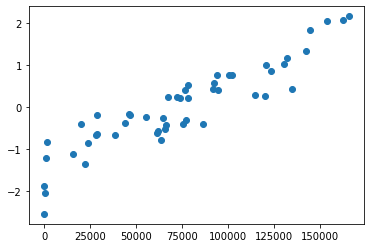

In [101]:
plt.scatter(x = startup['R&D_Spend'],y = error1)

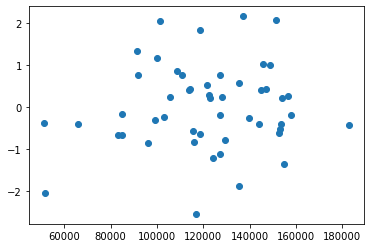

In [102]:
plt.scatter(x = startup['Administration'],y = error1)

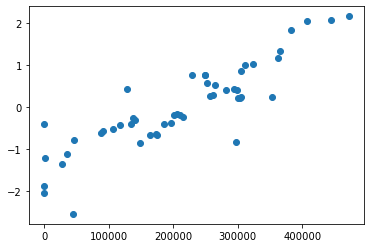

In [103]:
plt.scatter(x = startup['Marketing_Spend'],y = error1)

# Zero Residual Mean

Text(0.5, 1.0, 'Zero Residual Mean - Acutal o/p Vs Predticed o/p')

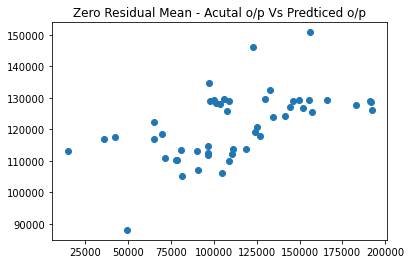

In [104]:
plt.scatter(x = y , y= y_pred1)
plt.title('Zero Residual Mean - Acutal o/p Vs Predticed o/p')

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
mean_absolute_error(y,y_pred)

6471.450396104808

In [118]:
mean_squared_error(y,y_pred)

78417126.01913084

In [113]:
r2_score(y,y_pred)

0.9507459940683246

## Detecting Influencers/Outliers

## Cook’s Distance

In [123]:
model_influence = model_2.get_influence()
c,_ = model_influence.cooks_distance

<StemContainer object of 3 artists>

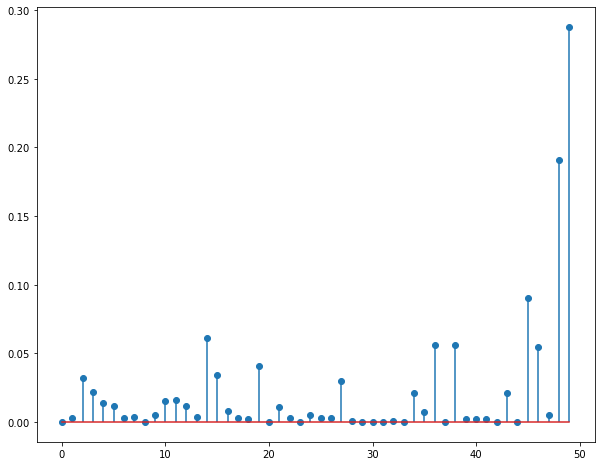

In [127]:
plt.figure(figsize=(10,8))
plt.stem(np.arange(len(startup)),np.round(c,3))


In [128]:
np.argmax(c),np.max(c)

(49, 0.2880822927543255)

## High Influence points

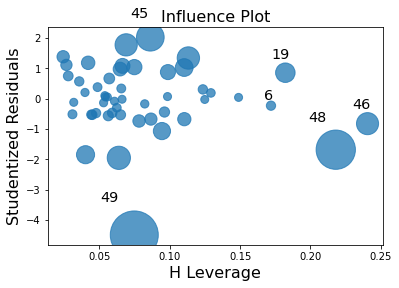

In [131]:
influence_plot(model_2)
plt.show()

In [134]:
startup.drop(startup.index[[49,48]],axis=0,inplace=True)

In [135]:
startup.shape

(48, 5)

In [136]:
X = startup.drop(labels=['Profit','State'],axis=1)
y = startup[['Profit']]

In [137]:
model_3 = smf.ols('y~X',data= startup).fit()

In [138]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.03e-31
Time:                        23:50:07   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
X[0]          -0.0633      0.044     -1.442      0.156      -0.152       0.025
X[1]           0.7895      0.036     21.718      0.000       0.716       0.863
X[2]           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
y_pred_2 = model_3.predict(X)

In [141]:
r2_score(y,y_pred_2)

0.9626766170294073